In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

In [2]:
def plot(sparsity_ratio, original, corrupted_data, layerwise_rearrange, net='resnet32', pruner='GraSP', dataset='cifar10', save=True):
    plt.figure(figsize=(7, 5))
    
    plt.plot(sparsity_ratio, original, label='original', color='tab:blue', marker='s')
    plt.plot(sparsity_ratio, layerwise_rearrange, label='layerwise rearrange', color='tab:red', marker='s')
    plt.plot(sparsity_ratio, corrupted_data, label='corrupted data', color='orange', marker='s')
    
    plt.title(pruner + '; ' + net)
    plt.xlabel('Sparsity Ratio')
    plt.ylabel('Test Accuracy')
    plt.xticks(sparsity_ratio + [1.0])
    plt.xticks(rotation=45, ha='right')
    if dataset=='cifar10':
        plt.ylim([87.5, 94.5])
        plt.yticks([88, 90, 92, 94])
    plt.grid()
    
    plt.legend()
    if save:
        plt.savefig(net + '_' + pruner + '_' + dataset + '.png')
    plt.show()

In [3]:
def get_summary_path(dataset, model, ratio, corrupt=False, rearrange=False, seed=0):
    path = 'runs/pruning/' + dataset + '/' + model + '/' + dataset + '_' + model + '_GraSP_prune_ratio_' + str(ratio)
    if corrupt:
        path = path + '_corrupt'
    if rearrange:
        path = path + '_rearrange'
    path = path + '/_seed_0/summary/'
    
    events = [event for event in os.listdir(path) if 'event' in event]
    events_numbers = np.array([int(event.split('.')[3]) for event in events])
    event = events[np.argmax(events_numbers)]
    
    path = path + event
    return path

def get_test_acc(dataset, model, ratios=[40, 60, 80, 90, 95, 98], corrupt=False, rearrange=False, seed=0):
    def helper(dataset, model, ratio, corrupt, rearrange, seed):
        path = get_summary_path(dataset, model, ratio, corrupt, rearrange, seed)
        accuracies = []
        for e in tf.compat.v1.train.summary_iterator(path):
            for v in e.summary.value:
                if 'test/acc' in v.tag:
                    accuracies.append(v.simple_value)
        return accuracies
    
    max_accs = []
    last_accs = []
    for ratio in ratios:
        accs = helper(dataset, model, ratio, corrupt, rearrange, seed)
        max_accs.append(max(accs))
        last_accs.append(accs[-1])
    return max_accs, last_accs

### cifar 10

In [4]:
ratios = [40, 60, 80, 90, 95, 98]
dataset = 'cifar10'

In [5]:
model = 'resnet32'
original_max, original_last = get_test_acc(dataset, model, ratios=ratios)
corrupt_max, corrupt_last = get_test_acc(dataset, model, ratios=ratios, corrupt=True)
rearrange_max, rearrange_last = get_test_acc(dataset, model, ratios=ratios, rearrange=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [6]:
print(original_last)
print(corrupt_last)
print(rearrange_last)

[93.5199966430664, 93.6500015258789, 93.16999816894531, 92.29000091552734, 91.36000061035156, 88.08999633789062]
[93.2699966430664, 93.44999694824219, 93.05999755859375, 92.23999786376953, 91.26000213623047, 88.80000305175781]
[93.68000030517578, 93.69999694824219, 93.23999786376953, 92.41000366210938, 91.22000122070312, 88.81999969482422]


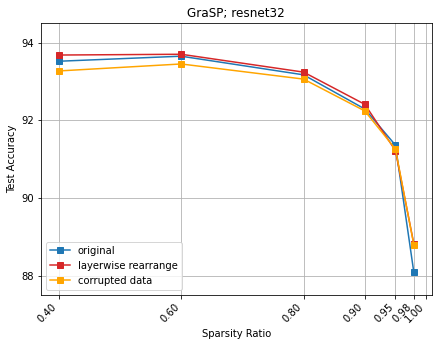

In [7]:
plot([ratio/100 for ratio in ratios], original_last, corrupt_last, rearrange_last, net=model, dataset=dataset)

In [8]:
model = 'vgg19'
original_max, original_last = get_test_acc(dataset, model, ratios=ratios)
corrupt_max, corrupt_last = get_test_acc(dataset, model, ratios=ratios, corrupt=True)
rearrange_max, rearrange_last = get_test_acc(dataset, model, ratios=ratios, rearrange=True)

In [9]:
print(original_last)
print(corrupt_last)
print(rearrange_last)

[92.9800033569336, 93.38999938964844, 93.61000061035156, 93.13999938964844, 92.62000274658203, 92.0]
[93.11000061035156, 93.08999633789062, 93.23999786376953, 93.30999755859375, 92.44999694824219, 91.93000030517578]
[93.36000061035156, 93.41999816894531, 93.30999755859375, 93.29000091552734, 92.76000213623047, 91.83000183105469]


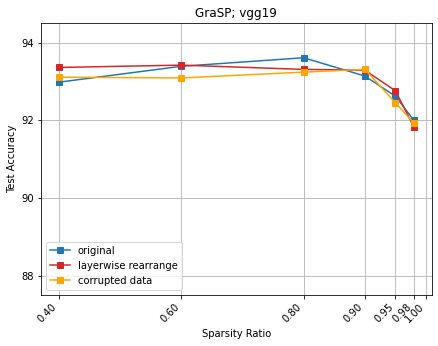

In [10]:
plot([ratio/100 for ratio in ratios], original_last, corrupt_last, rearrange_last, net=model, dataset=dataset)

### cifar 100

In [11]:
ratios = [90, 95, 98]
dataset = 'cifar100'

In [12]:
model = 'resnet32'
original_max, original_last = get_test_acc(dataset, model, ratios=ratios)
corrupt_max, corrupt_last = get_test_acc(dataset, model, ratios=ratios, corrupt=True)
rearrange_max, rearrange_last = get_test_acc(dataset, model, ratios=ratios, rearrange=True)

In [13]:
print(original_last)
print(corrupt_last)
print(rearrange_last)

[68.62999725341797, 66.22000122070312, 59.25]
[68.76000213623047, 66.04000091552734, 58.47999954223633]
[68.44999694824219, 65.86000061035156, 58.959999084472656]


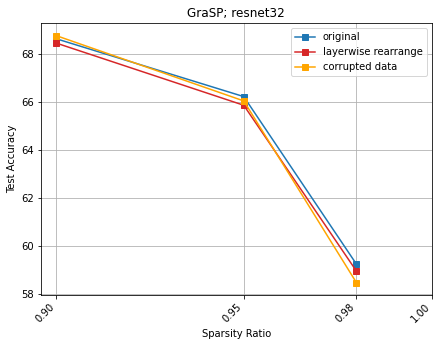

In [14]:
plot([ratio/100 for ratio in ratios], original_last, corrupt_last, rearrange_last, net=model, dataset=dataset)

In [15]:
model = 'vgg19'
original_max, original_last = get_test_acc(dataset, model, ratios=ratios)
corrupt_max, corrupt_last = get_test_acc(dataset, model, ratios=ratios, corrupt=True)
rearrange_max, rearrange_last = get_test_acc(dataset, model, ratios=ratios, rearrange=True)

In [16]:
print(original_last)
print(corrupt_last)
print(rearrange_last)

[71.62999725341797, 70.88999938964844, 68.30000305175781]
[71.30999755859375, 70.5199966430664, 68.5]
[71.05999755859375, 70.56999969482422, 68.05000305175781]


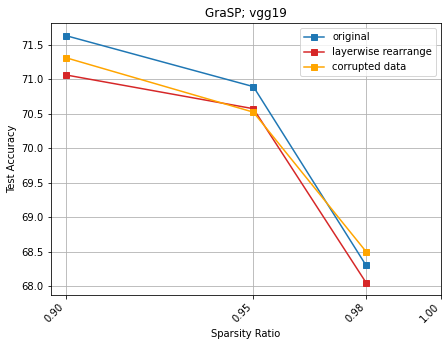

In [17]:
plot([ratio/100 for ratio in ratios], original_last, corrupt_last, rearrange_last, net=model, dataset=dataset)